## Exercise 1

### 1.1 Part-I: Implementation

#### Data Loading and Feature Extraction

In [11]:
import os
from PIL import Image
from skimage.feature import hog
from skimage import color
import numpy as np
import pandas as pd

In [2]:
lst_folders = ['data/train', 'data/test', 'data/val']

base_feature_path = 'extracted_features'
if not os.path.exists(base_feature_path):
    os.mkdir(base_feature_path)


for folder in lst_folders:
    image_path = folder
    feature_path = os.path.join(base_feature_path, os.path.basename(folder))
    
    if not os.path.exists(feature_path):
        os.mkdir(feature_path)
    
    features = []
    labels = []
    for file_name in os.listdir(folder):
        img_path = os.path.join(folder, file_name)
        gray_img = color.rgb2gray(Image.open(img_path))
        img = np.array(gray_img)
        
        hog_features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
        features.append(hog_features)
        
        age, gender, _ = file_name.split('_')
        labels.append((int(age), int(gender)))
    
    d_features = pd.DataFrame(features)
    d_labels = pd.DataFrame(labels, columns=['Age', 'Gender'])
    
    db = pd.concat([d_labels, d_features], axis=1)
    db.to_csv('extracted_features/' + os.path.basename(folder) + f'/{os.path.basename(folder)}.csv', index=False)


In [3]:
data = pd.read_csv('extracted_features/train/train.csv')
data.head(5)

,Age,Gender,0,1,2,3,4,5,6,7,...,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295
0,10,0,0.460095,0.460095,0.460095,0.388822,0.394166,0.131956,0.121616,0.154623,...,0.358044,0.362633,0.362633,0.362633,0.362633,0.339451,0.218709,0.218911,0.362633,0.362633
1,10,0,0.369531,0.369531,0.369531,0.241495,0.261745,0.232063,0.369531,0.369531,...,0.364455,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.232959
2,10,0,0.432369,0.206820,0.146763,0.070607,0.331754,0.269939,0.432369,0.432369,...,0.437323,0.386651,0.196107,0.210951,0.141591,0.386651,0.386651,0.386651,0.386651,0.386651
3,10,0,0.524676,0.524676,0.227150,0.132113,0.203752,0.047193,0.053535,0.241837,...,0.064359,0.126147,0.371850,0.297380,0.109250,0.082859,0.070136,0.536463,0.536463,0.397585
4,10,0,0.374774,0.298874,0.305789,0.195521,0.374774,0.374774,0.284330,0.369150,...,0.367549,0.351560,0.351560,0.351560,0.351560,0.136269,0.351560,0.340984,0.351560,0.351560


In [12]:
data


,Age,Gender,0,1,2,3,4,5,6,7,...,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295
0,10,0,0.460095,0.460095,0.460095,0.388822,0.394166,0.131956,0.121616,0.154623,...,0.358044,0.362633,0.362633,0.362633,0.362633,0.339451,0.218709,0.218911,0.362633,0.362633
1,10,0,0.369531,0.369531,0.369531,0.241495,0.261745,0.232063,0.369531,0.369531,...,0.364455,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.232959
2,10,0,0.432369,0.206820,0.146763,0.070607,0.331754,0.269939,0.432369,0.432369,...,0.437323,0.386651,0.196107,0.210951,0.141591,0.386651,0.386651,0.386651,0.386651,0.386651
3,10,0,0.524676,0.524676,0.227150,0.132113,0.203752,0.047193,0.053535,0.241837,...,0.064359,0.126147,0.371850,0.297380,0.109250,0.082859,0.070136,0.536463,0.536463,0.397585
4,10,0,0.374774,0.298874,0.305789,0.195521,0.374774,0.374774,0.284330,0.369150,...,0.367549,0.351560,0.351560,0.351560,0.351560,0.136269,0.351560,0.340984,0.351560,0.351560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9,0,0.401805,0.401805,0.289158,0.147023,0.262280,0.401805,0.136915,0.401805,...,0.132978,0.148437,0.684380,0.684380,0.155095,0.031157,0.039682,0.052377,0.044833,0.099299
2996,9,0,0.449010,0.449010,0.449010,0.206644,0.239816,0.075189,0.086685,0.283160,...,0.323160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2997,9,0,0.557892,0.557892,0.342935,0.136616,0.204150,0.089751,0.089789,0.182783,...,0.152348,0.196044,0.121895,0.040775,0.109693,0.431975,0.431975,0.431975,0.431975,0.431975
2998,9,1,0.385038,0.644973,0.644973,0.096158,0.083225,0.037096,0.006501,0.039754,...,0.351773,0.356184,0.335571,0.181234,0.305522,0.356184,0.356184,0.356184,0.356184,0.356184


#### Linear Regression

In [4]:
def linear_regr_train(features, labels):
    phi = np.linalg.inv(features.T @ features) @ features.T @ labels
    residuals = labels - features @ phi
    print(residuals.reshape(-1, 1).T.shape, residuals.reshape(-1, 1).shape)
    print(np.dot(residuals.reshape(-1, 1), residuals.reshape(-1, 1).T).shape)
    sigma_2 = (residuals.reshape(-1, 1) @ residuals.reshape(-1, 1).T) @ np.linalg.inv(np.eye(len(features)))#(features.shape[0] - features.shape[1])
    return phi, sigma_2

train_data = pd.read_csv('extracted_features/train/train.csv')
train_features = data.iloc[:, 2:].values
train_labels = data.iloc[:, 0].values
predictions, _ = linear_regr_train(train_features, train_labels)

(1, 3000) (3000, 1)
(3000, 3000)


#### Gaussian Process Regression

In [21]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# def rbf_kernel(X1, X2, lamb = 0.91):
# X1_norm = np.sum(X1 ** 2, axis = -1)
#     X2_norm = np.sum(X2 ** 2, axis = -1)
#     return np.exp(-0.5 * (X1_norm[:,None] + X2_norm[None,:] - 2 * np.dot(X1, X2.T)) / lamb ** 2)

def rbf_kernel(x1, x2, l=0.91, sigma_f=1):
    dist_matrix = np.sum(np.square(x1), axis=1).reshape(-1, 1) + np.sum(np.square(x2), axis=1) - 2 * np.dot(x1, x2.T)
    return np.square(sigma_f) * np.exp(-1 / (2 * np.square(l)) * dist_matrix)

def posterior_predictive(train_features, test_features, train_labels):
        sigma_2 = 1#linear_regr_train(rbf_kernel(train_features, train_features) + 10e-7 * np.eye(len(rbf_kernel(train_features, train_features))), train_labels)
        sigma_p = 0.5 # = sigma_p ** 2
        
        K_X_X = rbf_kernel(train_features, train_features)
        K_x_X = rbf_kernel(train_features, test_features)
        
        K_inv = np.linalg.inv(K_X_X + sigma_2 / sigma_p * np.eye(len(K_X_X)))
#       print(sigma_p / sigma_2 * K_x_X @ train_labels)
        print(K_x_X.shape, train_labels.shape, K_x_X.shape, K_inv.shape, K_X_X.shape, train_labels.shape)
        phi = sigma_p / sigma_2 * K_x_X @ train_labels - sigma_p / sigma_2 * K_x_X @ K_inv @ K_X_X @ train_labels
        print(K_x_X.shape, train_labels.shape, K_x_X.shape, K_inv.shape, K_X_X.shape, train_labels.shape)
        return phi

test_data = pd.read_csv('extracted_features/test/test.csv')
test_features = test_data.iloc[:, 2:].values
test_labels = test_data.iloc[:, 0].values

train_data = pd.read_csv('extracted_features/train/train.csv')
train_features = data.iloc[:, 2:].values
train_labels = data.iloc[:, 0].values

phi = posterior_predictive(train_features, test_features, train_labels)
print(phi.shape)
print(test_labels.shape)
print(test_features.shape)
linear_mae = mean_absolute_error(test_labels, rbf_kernel(test_features, test_features) @ phi)
print(f"Linear Regression MAE: {linear_mae}")

(3000, 1000) (3000,) (3000, 1000) (3000, 3000) (3000, 3000) (3000,)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3000 is different from 1000)

#### Evaluate Models

In [18]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

train_data = pd.read_csv('extracted_features/train/train.csv')
train_features = data.iloc[:, 2:].values
train_labels = data.iloc[:, 0].values

test_data = pd.read_csv('extracted_features/test/test.csv')
test_features = test_data.iloc[:, 2:].values
test_labels = test_data.iloc[:, 0].values

phi, _ = linear_regr_train(train_features, train_labels)
linear_mae = mean_absolute_error(test_labels, test_features @ phi)
print(f"Linear Regression MAE: {linear_mae}")

print(phi.shape)
print(test_labels.shape)
print(test_features.shape)

# phi = posterior_predictive(train_features, test_features, train_labels)
# linear_mae = mean_absolute_error(test_labels, rbf_kernel(test_features, test_features) @ phi)
# print(f"GP Regression MAE: {linear_mae}")

(1, 3000) (3000, 1)
(3000, 3000)
Linear Regression MAE: 15.632807791513736
(1296,)
(1000,)
(1000, 1296)


#### Visualization

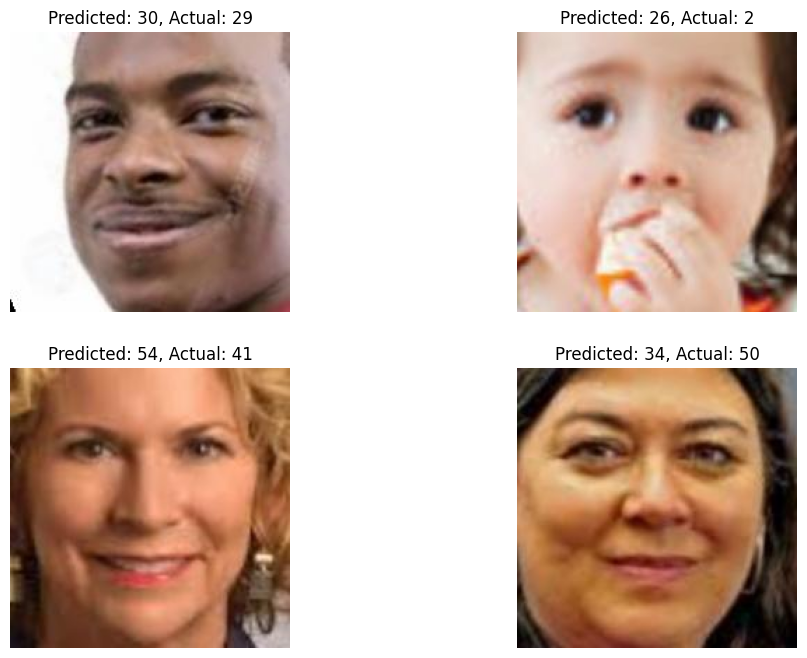

In [7]:
import matplotlib.pyplot as plt

def load_images_and_features(data_dir, image_size=(64, 64)):
    images = []
    filenames = os.listdir(data_dir)
    for filename in filenames:
        image_path = os.path.join(data_dir, filename)
        image = plt.imread(image_path)
        images.append(image)

    return np.array(images)

def visualize_predictions(images, y_true, y_pred):

    indices = np.random.choice(len(images), 4, replace=False)
    selected_images = images[indices]
    selected_y_true = y_true[indices]
    selected_y_pred = y_pred[indices]

    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.imshow(selected_images[i], cmap='gray')
        plt.title(f"Predicted: {int(selected_y_pred[i])}, Actual: {selected_y_true[i]}")
        plt.axis('off')
    plt.show()

    # Define the test directory
test_dir = 'data/test'

# Load test images, their features and labels
test_images = load_images_and_features(test_dir)
visualize_predictions(test_images, test_labels,test_features @ phi)

### 1.1 Part-II: Optimization of the results  

### Gender Classification

#### Data loading and Feature extraction

In [8]:
lst_folders = ['data/train', 'data/test', 'data/val']

base_feature_path = 'extracted_features'
if not os.path.exists(base_feature_path):
    os.mkdir(base_feature_path)


for folder in lst_folders:
    image_path = folder
    feature_path = os.path.join(base_feature_path, os.path.basename(folder))
    
    if not os.path.exists(feature_path):
        os.mkdir(feature_path)
    
    features = []
    labels = []
    for file_name in os.listdir(folder):
        img_path = os.path.join(folder, file_name)
        gray_img = color.rgb2gray(Image.open(img_path))
        img = np.array(gray_img)
        
        hog_features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
        features.append(hog_features)
        
        age, gender, _ = file_name.split('_')
        labels.append((int(age), int(gender)))
    
    d_features = pd.DataFrame(features)
    d_labels = pd.DataFrame(labels, columns=['Age', 'Gender'])
    
    db = pd.concat([d_labels, d_features], axis=1)
    db.to_csv('extracted_features/' + os.path.basename(folder) + f'/{os.path.basename(folder)}.csv', index=False)


In [9]:
data_train = pd.read_csv('extracted_features/train/train.csv')
train_features = data_train.iloc[:, 2:].values
train_labels = data_train.iloc[:, 1].values

data_val = pd.read_csv('extracted_features/val/val.csv')
val_features = data_val.iloc[:, 2:].values
val_labels = data_val.iloc[:, 1].values


data_train.head(5)

,Age,Gender,0,1,2,3,4,5,6,7,...,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295
0,10,0,0.460095,0.460095,0.460095,0.388822,0.394166,0.131956,0.121616,0.154623,...,0.358044,0.362633,0.362633,0.362633,0.362633,0.339451,0.218709,0.218911,0.362633,0.362633
1,10,0,0.369531,0.369531,0.369531,0.241495,0.261745,0.232063,0.369531,0.369531,...,0.364455,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.343826,0.232959
2,10,0,0.432369,0.206820,0.146763,0.070607,0.331754,0.269939,0.432369,0.432369,...,0.437323,0.386651,0.196107,0.210951,0.141591,0.386651,0.386651,0.386651,0.386651,0.386651
3,10,0,0.524676,0.524676,0.227150,0.132113,0.203752,0.047193,0.053535,0.241837,...,0.064359,0.126147,0.371850,0.297380,0.109250,0.082859,0.070136,0.536463,0.536463,0.397585
4,10,0,0.374774,0.298874,0.305789,0.195521,0.374774,0.374774,0.284330,0.369150,...,0.367549,0.351560,0.351560,0.351560,0.351560,0.136269,0.351560,0.340984,0.351560,0.351560


#### Logistic Regression

In [10]:
def activation(X):
    return 1 / (1 + np.exp(-X) + 1e-4)

def first_grad(sig, X, Y):
    return -1 * (X.T @ (sig - Y))

def second_grad(sig, X):
    sig = sig.reshape(-1, 1)
    r = sig.T @ (1 - sig)
    return -1 * (X.T @ X * r)

def get_loss(X, Y, W):
    sig = activation(X @ W)
    return np.log(sig) @ Y + np.log(1 - sig) @ (1 - Y)

def get_acc(X, Y, W):
    sig = activation(X @ W)
    predictions = []
    for i in range(len(Y)):
        if sig[i] > 0.5:
            preictions.append(1)
        else:
            preictions.append(0)
    return np.sum(predictions == Y) / len(Y)

max_iter = 1000
W = np.random.uniform(0, 1, size=(train_features.shape[1]))
train_loss_history = []
val_loss_history = []
step_history = []
train_sig = activation(train_features @ W)

for step in range(max_iter):
    f_g = first_grad(train_sig, train_features, train_labels)
    s_g = np.linalg.inv(second_grad(train_sig, train_features))
    W = W - 0.1 * s_g @ f_g
    if step % 200 == 0:
        train_sig = activation(train_features @ W)
        val_sig = activation(val_features @ W)
        train_loss = get_loss(train_features, train_labels, W)
        val_loss   = get_loss(val_features, val_labels, W)
        print(f"Train loss: {train_loss}", f"Validation loss: {val_loss}")
        step_history.append(step)
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

# Accuracy on test dataset
data_test = pd.read_csv('extracted_features/test/test.csv')
test_features = data_test.iloc[:, 2:].values
test_labels = data_test.iloc[:, 1].values
test_loss = get_loss(test_features, test_labels, W)
test_acc = get_acc(test_features, test_labels, W)
print(f"Test Loss: {test_loss} \n Test Accuracy: {test_acc}")

# Plot loss over iterations
plt.plot(step_history, train_loss_history, label='Train Loss')
plt.plot(step_history, val_loss_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Negative Log Likelihood Loss')
plt.legend()
plt.show()

Train loss: -13917.124287056788 Validation loss: -4798.687328799835
Train loss: -13917.124287056788 Validation loss: -4798.687328799835
Train loss: -13819.297506534127 Validation loss: -4477.037352870933
Train loss: -12422.842325394737 Validation loss: -4182.057305371759
Train loss: -12205.35319961723 Validation loss: -4165.432503116066


NameError: name 'preictions' is not defined